# Clustering Using K-Means Algorithm

# Challenge

In [1]:
#Importing required python liabraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Task 1

In [2]:
#Importing dataset
df=pd.read_csv(r'C:\Users\Admin\Desktop\Machine Learning\Repository\DS2_C6_S2_CarSales_Data_Challenge.csv')
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [3]:
#Dropping Year Resale Value
df.drop(columns=['__year_resale_value'],inplace=True)

In [4]:
df.isnull().sum()

Manufacturer          0
Model                 0
Sales_in_thousands    0
Vehicle_type          0
Price_in_thousands    2
Engine_size           1
Horsepower            1
Wheelbase             1
Width                 1
Length                1
Curb_weight           2
Fuel_capacity         1
Fuel_efficiency       3
Latest_Launch         0
Power_perf_factor     2
dtype: int64

In [5]:
#Dropping missing values
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

Manufacturer          0
Model                 0
Sales_in_thousands    0
Vehicle_type          0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
Latest_Launch         0
Power_perf_factor     0
dtype: int64

In [7]:
# exploring the existing data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 156
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        152 non-null    object 
 1   Model               152 non-null    object 
 2   Sales_in_thousands  152 non-null    float64
 3   Vehicle_type        152 non-null    object 
 4   Price_in_thousands  152 non-null    float64
 5   Engine_size         152 non-null    float64
 6   Horsepower          152 non-null    float64
 7   Wheelbase           152 non-null    float64
 8   Width               152 non-null    float64
 9   Length              152 non-null    float64
 10  Curb_weight         152 non-null    float64
 11  Fuel_capacity       152 non-null    float64
 12  Fuel_efficiency     152 non-null    float64
 13  Latest_Launch       152 non-null    object 
 14  Power_perf_factor   152 non-null    float64
dtypes: float64(11), object(4)
memory usage: 19.0+ KB


In [8]:
#Label Encoding
lbl=LabelEncoder()
df['Manufacturer']=lbl.fit_transform(df['Manufacturer'])
df['Model']=lbl.fit_transform(df['Model'])
df['Vehicle_type']=lbl.fit_transform(df['Vehicle_type'])
df['Latest_Launch']=lbl.fit_transform(df['Latest_Launch'])

In [9]:
#Data Scaling

sc=StandardScaler()
df_scale=sc.fit_transform(df)
df_scale=pd.DataFrame(df_scale,columns=df.columns)
df_scale

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,-1.731004,0.065039,-0.530336,0.597614,-0.405800,-1.193989,-0.791180,-0.807785,-1.097174,-1.091782,-1.161844,-1.212659,0.969070,-0.442318,-0.734082
1,-1.731004,1.467461,-0.203388,0.597614,0.074328,0.143983,0.709634,0.089203,-0.228427,0.435008,0.221934,-0.193449,0.269868,0.749072,0.584374
2,-1.731004,0.846717,-0.651583,0.597614,1.020668,0.430691,0.444785,0.934192,0.090113,0.710575,0.746760,0.010393,-0.429335,-0.306933,0.585131
3,-1.613648,-1.544298,-0.479719,0.597614,-0.232537,-1.193989,-0.614614,-0.625788,-0.836550,-0.674708,-0.596040,-0.397291,0.736002,-1.173398,-0.554885
4,-1.613648,-1.521307,-0.503252,0.597614,0.460518,-0.238295,0.268218,0.167202,1.451150,0.367978,0.291280,0.137795,-0.429335,1.425998,0.313210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,1.672326,1.559423,-0.724977,0.597614,-0.204007,-1.098420,-0.438047,-0.898784,-1.010299,-0.778977,-0.526693,-0.550172,0.269868,1.561384,-0.406619
148,1.672326,1.076622,-0.554699,0.597614,0.011702,-0.620573,-0.296794,-0.326792,-0.518009,-0.086335,-0.265068,-0.015087,0.269868,-1.010936,-0.241041
149,1.672326,1.582413,-0.521430,0.597614,0.102161,-0.620573,-0.296794,-0.326792,-0.518009,-0.063992,-0.184689,-0.015087,0.269868,0.640764,-0.221060
150,1.672326,-1.176449,-0.725734,0.597614,1.264211,-0.716142,0.903857,-0.326792,0.119072,-0.101231,0.354322,0.137795,-0.196267,0.207531,0.992876


# Task 2

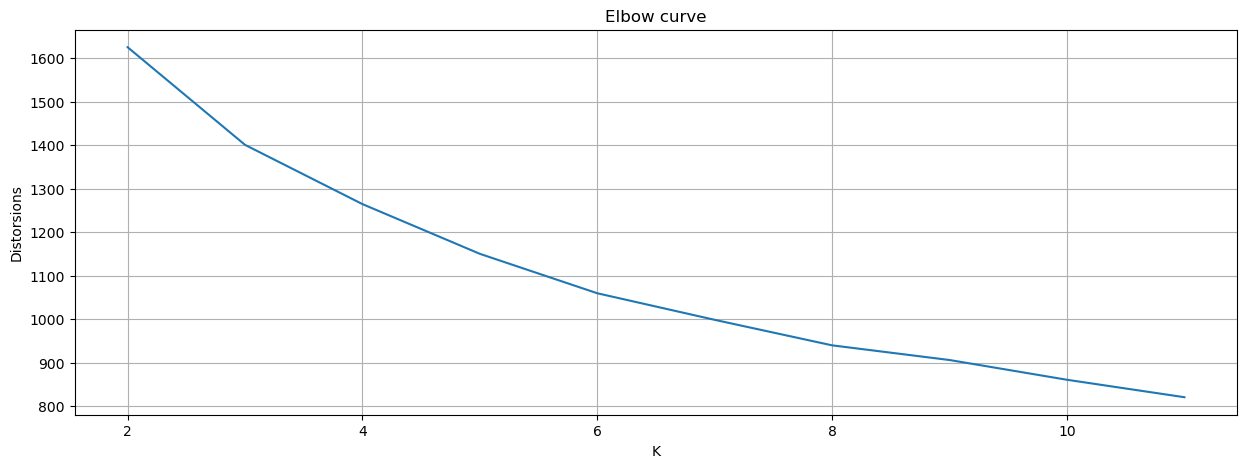

In [10]:
#Finding optimum value of K using Elbow Method

distorsions = []
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scale)
    distorsions.append(kmeans.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 12), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

For n_clusters = 2 The average silhouette_score is : 0.2359851447293284
For n_clusters = 3 The average silhouette_score is : 0.22471599240449025
For n_clusters = 4 The average silhouette_score is : 0.17051654883350115
For n_clusters = 5 The average silhouette_score is : 0.20813895193560575
For n_clusters = 6 The average silhouette_score is : 0.1535591842475315
For n_clusters = 7 The average silhouette_score is : 0.1559544041189742
For n_clusters = 8 The average silhouette_score is : 0.15966857017681638
For n_clusters = 9 The average silhouette_score is : 0.16709317119611025
For n_clusters = 10 The average silhouette_score is : 0.1363724657032788
For n_clusters = 11 The average silhouette_score is : 0.1530579066258445
For n_clusters = 12 The average silhouette_score is : 0.14885411954018526


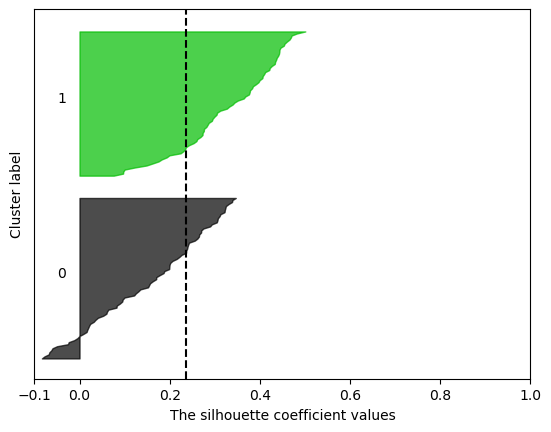

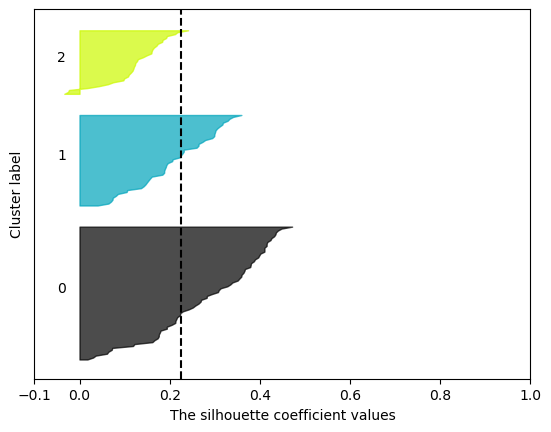

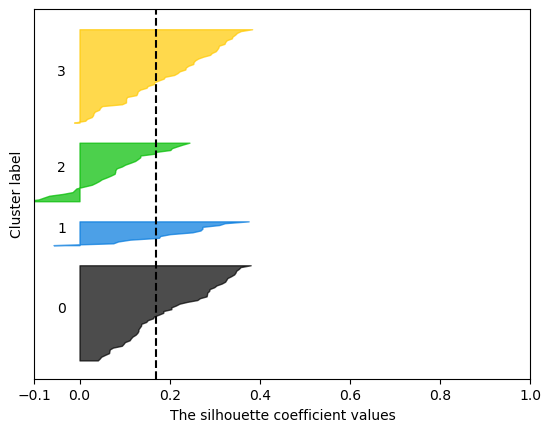

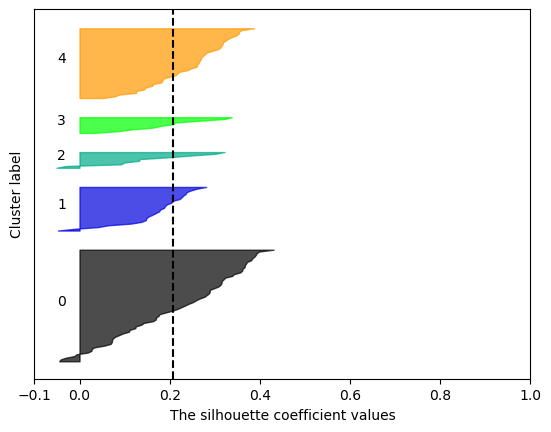

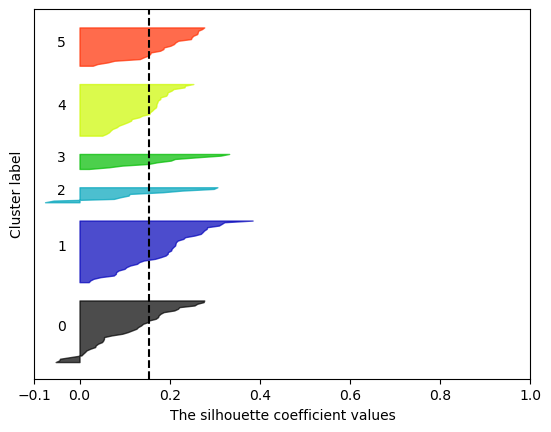

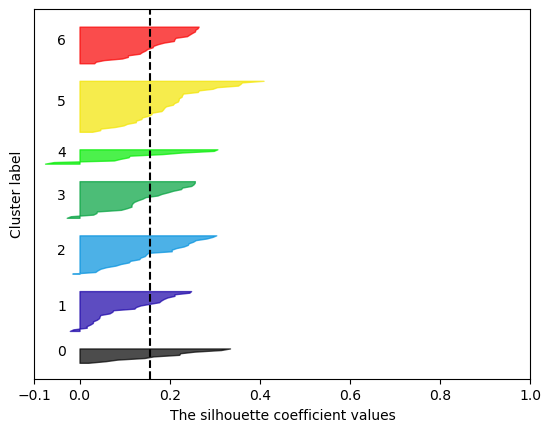

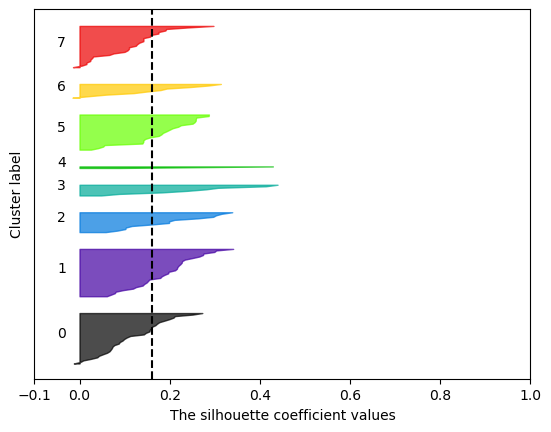

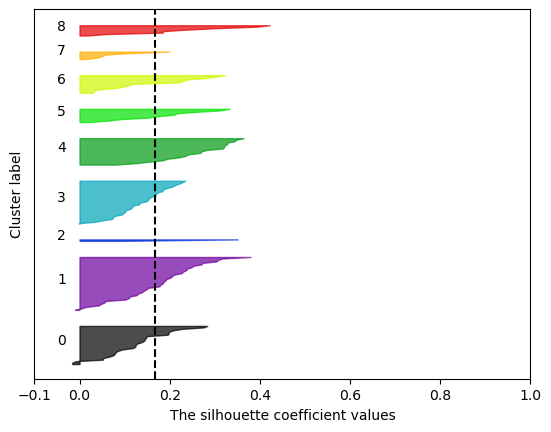

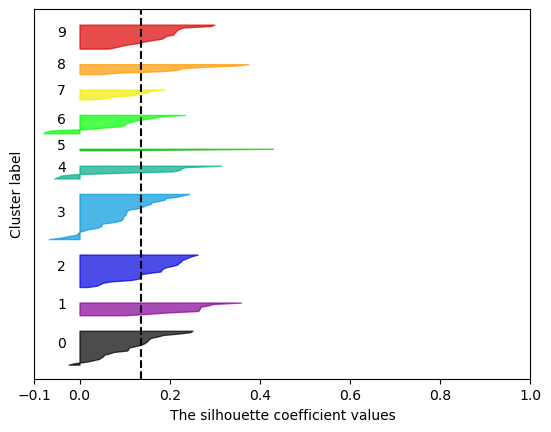

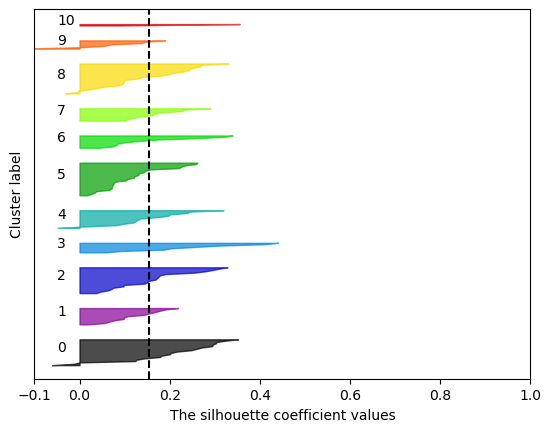

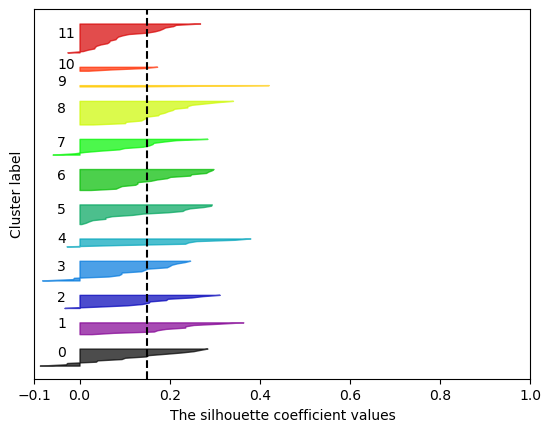

In [11]:
#optimum value of k using silhouette
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for n_clusters in range_n_clusters:
 # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_scale) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_scale)
    silhouette_avg = silhouette_score(df_scale, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
 # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_scale, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,facecolor=color, edgecolor=color, alpha=0.7)
     # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
 # Compute the new y_lower for next plot
        y_lower = y_upper + 10 # 10 for the 0 samples
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
 # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="black", linestyle="--")
    ax1.set_yticks([]) # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

# Task 3

In [12]:
#Building the model with best k value

kmeans_model=KMeans(n_clusters=3)
kmeans_model.fit(df_scale)
predict=kmeans_model.fit_predict(df_scale)
predict

array([1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 0, 0,
       2, 2, 2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 2, 0, 0,
       1, 2, 2, 2, 1, 1, 2, 2, 0, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1,
       1, 0, 2, 1, 1, 2, 2, 2, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2])

In [14]:
X=df_scale.iloc[:,[0,2]].values    #Sales_in_thousands vs Vehicle_type_encoded
data=pd.DataFrame(X)
data.head()

,0,1
0,-1.731004,-0.530336
1,-1.731004,-0.203388
2,-1.731004,-0.651583
3,-1.613648,-0.479719
4,-1.613648,-0.503252


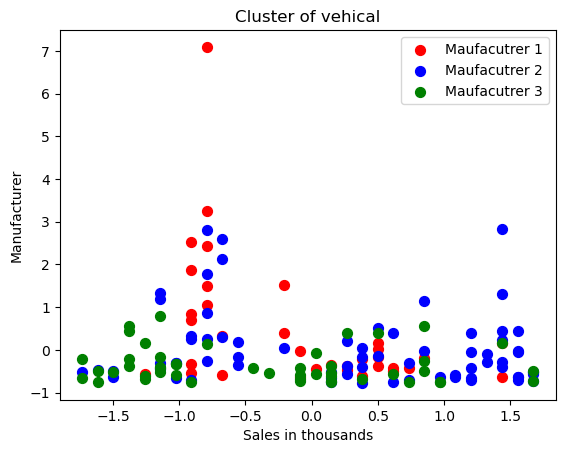

In [15]:
#Obtaining Clusters

plt.scatter(X[predict == 0,0], X[predict ==0,1], s=50, c='red', label='Maufacutrer 1')
plt.scatter(X[predict == 1,0], X[predict ==1,1], s=50, c='blue', label='Maufacutrer 2')
plt.scatter(X[predict == 2,0], X[predict ==2,1], s=50, c='green', label='Maufacutrer 3')

plt.title('Cluster of vehical')
plt.xlabel('Sales in thousands')
plt.ylabel('Manufacturer')
plt.legend()
plt.show()

In [16]:
# Evaulating clusters
df_scale['Pre']=predict
df_scale.head()

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Pre
0,-1.731004,0.065039,-0.530336,0.597614,-0.405800,-1.193989,-0.791180,-0.807785,-1.097174,-1.091782,-1.161844,-1.212659,0.969070,-0.442318,-0.734082,1
1,-1.731004,1.467461,-0.203388,0.597614,0.074328,0.143983,0.709634,0.089203,-0.228427,0.435008,0.221934,-0.193449,0.269868,0.749072,0.584374,2
2,-1.731004,0.846717,-0.651583,0.597614,1.020668,0.430691,0.444785,0.934192,0.090113,0.710575,0.746760,0.010393,-0.429335,-0.306933,0.585131,2
3,-1.613648,-1.544298,-0.479719,0.597614,-0.232537,-1.193989,-0.614614,-0.625788,-0.836550,-0.674708,-0.596040,-0.397291,0.736002,-1.173398,-0.554885,1
4,-1.613648,-1.521307,-0.503252,0.597614,0.460518,-0.238295,0.268218,0.167202,1.451150,0.367978,0.291280,0.137795,-0.429335,1.425998,0.313210,2
